In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
import warnings

In [37]:
data =  pd.read_csv('gapminder_alcohol.csv')

In [38]:
data.head()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70


In [39]:
data.tail()

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
208,Vietnam,3.91,722.807559,11.653322,71.000000,27.84
209,West Bank and Gaza,NaN,NaN,NaN,32.000000,71.90
210,"Yemen, Rep.",0.20,610.357367,6.265789,39.000000,30.64
211,Zambia,3.56,432.226337,12.019036,61.000000,35.42
212,Zimbabwe,4.96,320.771890,13.905267,66.800003,37.34


In [40]:
data.shape

(213, 6)

In [79]:
data.describe()

,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
count,187.000000,190.000000,191.000000,178.000000,203.000000
mean,6.689412,8740.966076,9.640839,58.635955,56.769360
std,4.899617,14262.809083,6.300178,10.519454,23.844933
min,0.030000,103.775857,0.201449,32.000000,10.400000
25%,2.625000,748.245151,4.988449,51.225000,36.830000
50%,5.920000,2553.496056,8.262893,58.699999,57.940000
75%,9.925000,9379.891166,12.328551,64.975000,74.210000
max,23.010000,105147.437700,35.752872,83.199997,100.000000


alcconsumption vs incomeperperson

alcconsumption vs suicideper100th

employrate vs urbanrate

suicideper100th vs urbanrate

alcconsumption vs employrate

suicideper100th vs  incomeperperson

alcconsumption vs weather

In [41]:
data.nunique()

country            213
alcconsumption     180
incomeperperson    190
suicideper100th    191
employrate         139
urbanrate          194
dtype: int64

In [42]:
data.isna().sum()

country             0
alcconsumption     26
incomeperperson    23
suicideper100th    22
employrate         35
urbanrate          10
dtype: int64

In [59]:
url = ’http://api.openweathermap.org/data/2.5/weather?
api_key = "4c1fa15b27f4e8aa87b0a2c01d2221e4"
country_name = data['country']
query_url = f'{url}{country_name}&appid={api_key}'

Object `weather` not found.


In [60]:
response = requests.get(url, params=params)

In [61]:
weatherdata =response.json()

In [62]:
weatherdata

{'cod': 401,
 'message': 'Invalid API key. Please see http://openweathermap.org/faq#error401 for more info.'}

In [53]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


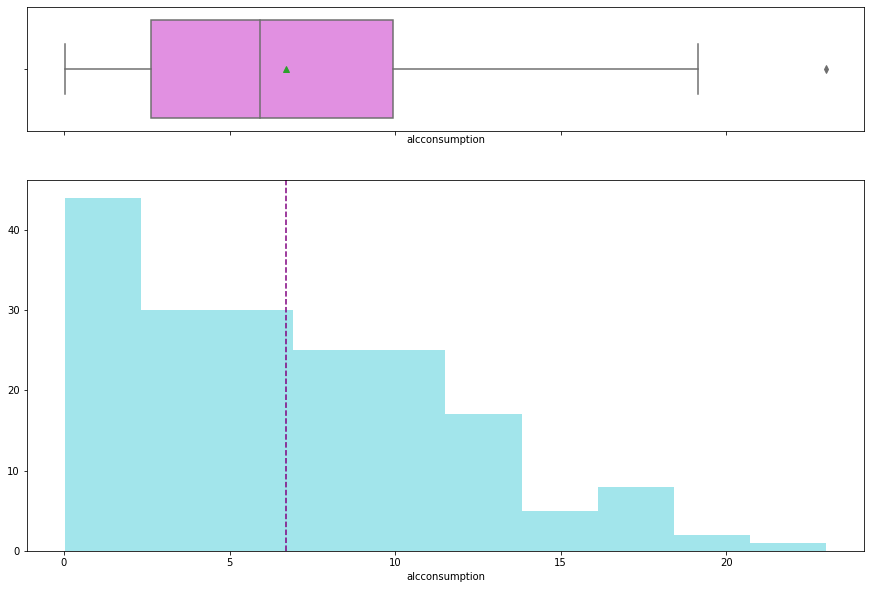

In [54]:
histogram_boxplot(data["alcconsumption"])

#### The median on the Alcohol consumption in the dataset is 7. 

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


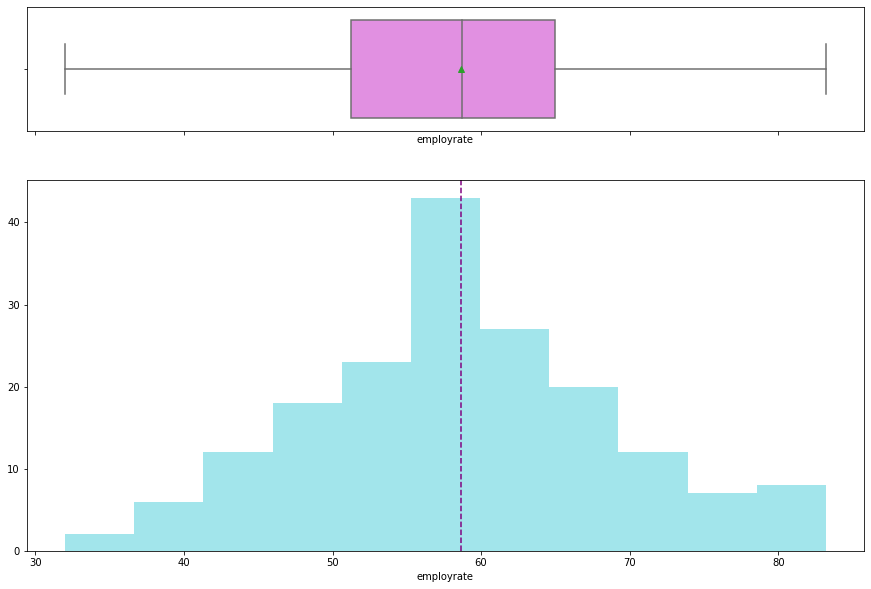

In [63]:
histogram_boxplot(data["employrate"])

#### The median on the Employement Rate in the dataset is 58%. 

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


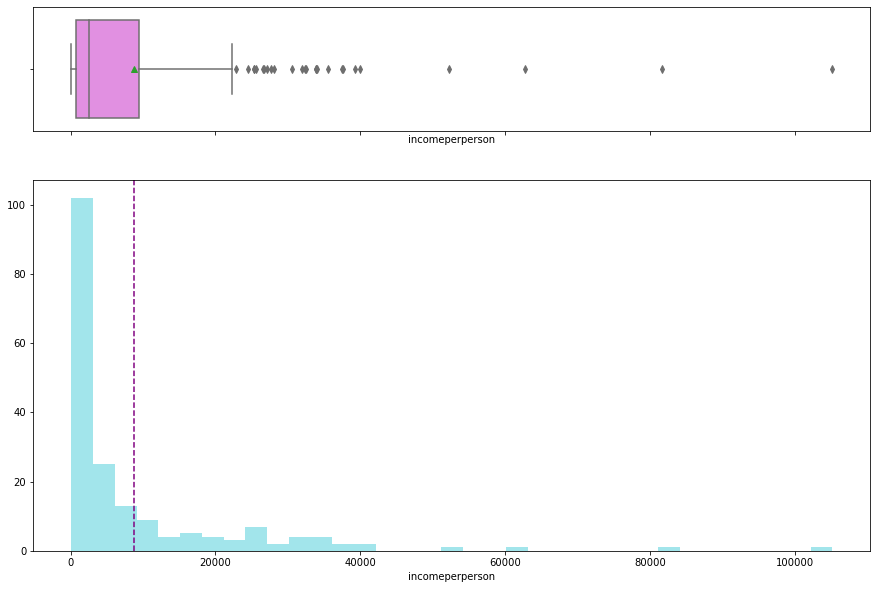

In [64]:
histogram_boxplot(data["incomeperperson"])

#### The median on the Sucide Rate in the dataset is 9000. 

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


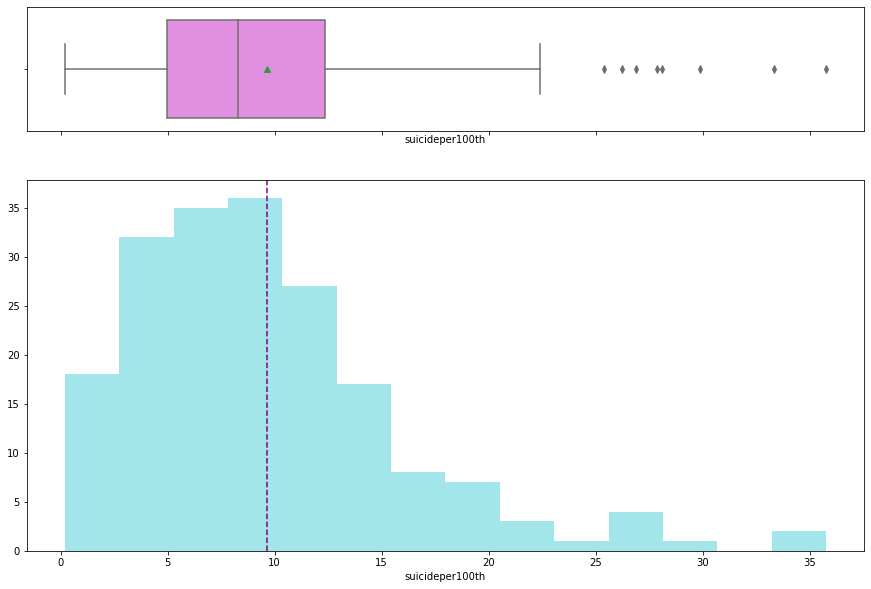

In [65]:
histogram_boxplot(data["suicideper100th"])

#### The median on the Sucide Rate in the dataset is 9. 

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


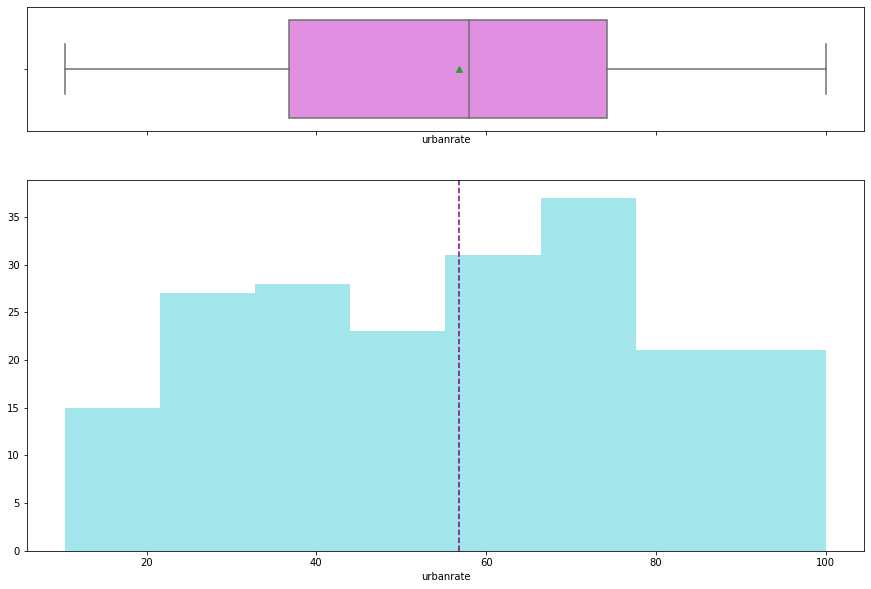

In [73]:
histogram_boxplot(data["urbanrate"])

#### The median on the urban rate is 58. 

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'alcconsumption'),
  Text(0, 1.5, 'incomeperperson'),
  Text(0, 2.5, 'suicideper100th'),
  Text(0, 3.5, 'employrate'),
  Text(0, 4.5, 'urbanrate')])

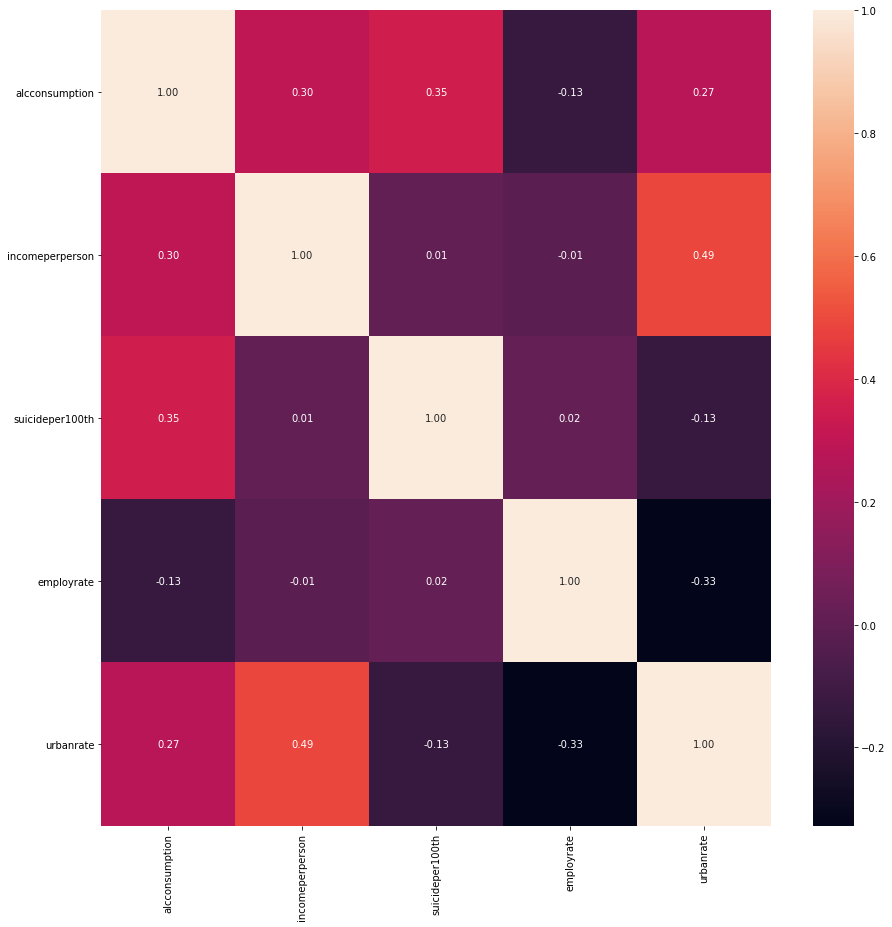

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

## Correlation 

- The highest correlation is between Urban Rate and Income per person with a rate of 0.49.
- The correlation between Alcohol consumption and Suicides per 100 people is 0.35.
- The correlation between Alcohol consumption and Income per person is .30.
- The correlation between Alcohol consumption and Urban Rates .27.

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seabor

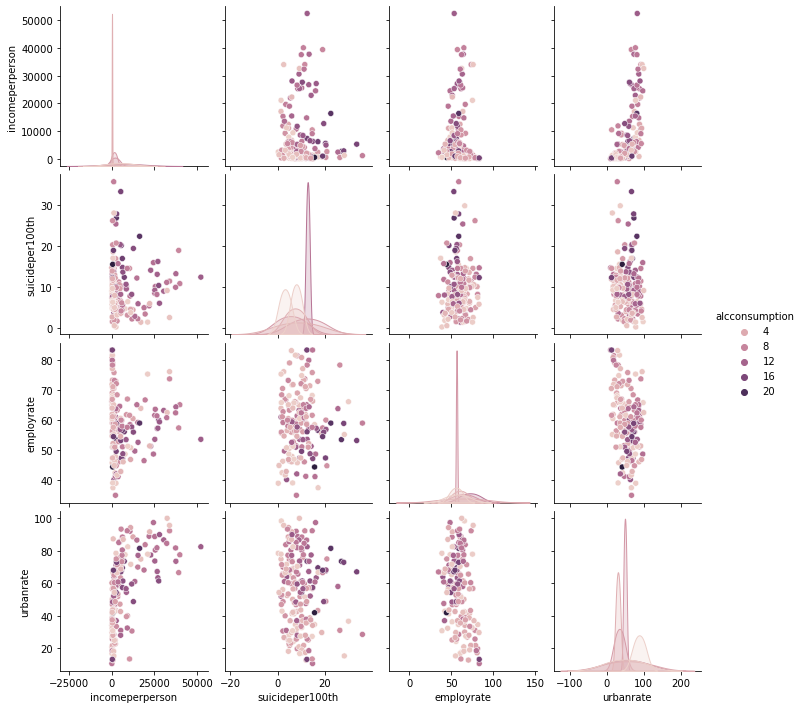

In [76]:
sns.pairplot(data=data,hue="alcconsumption")
plt.show()

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

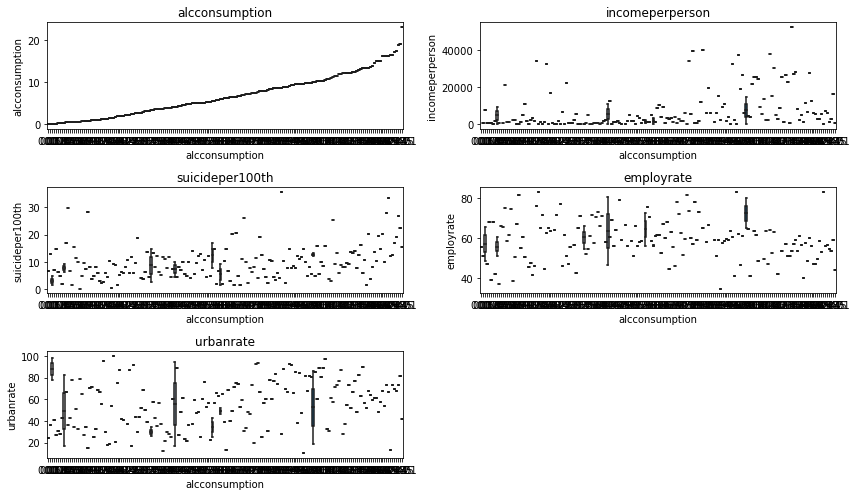

In [77]:
cols = data[['alcconsumption','incomeperperson','suicideper100th','employrate','urbanrate']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["alcconsumption"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [68]:
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total)  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
        
    plt.show()  # show the plot

/Users/datinarwo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


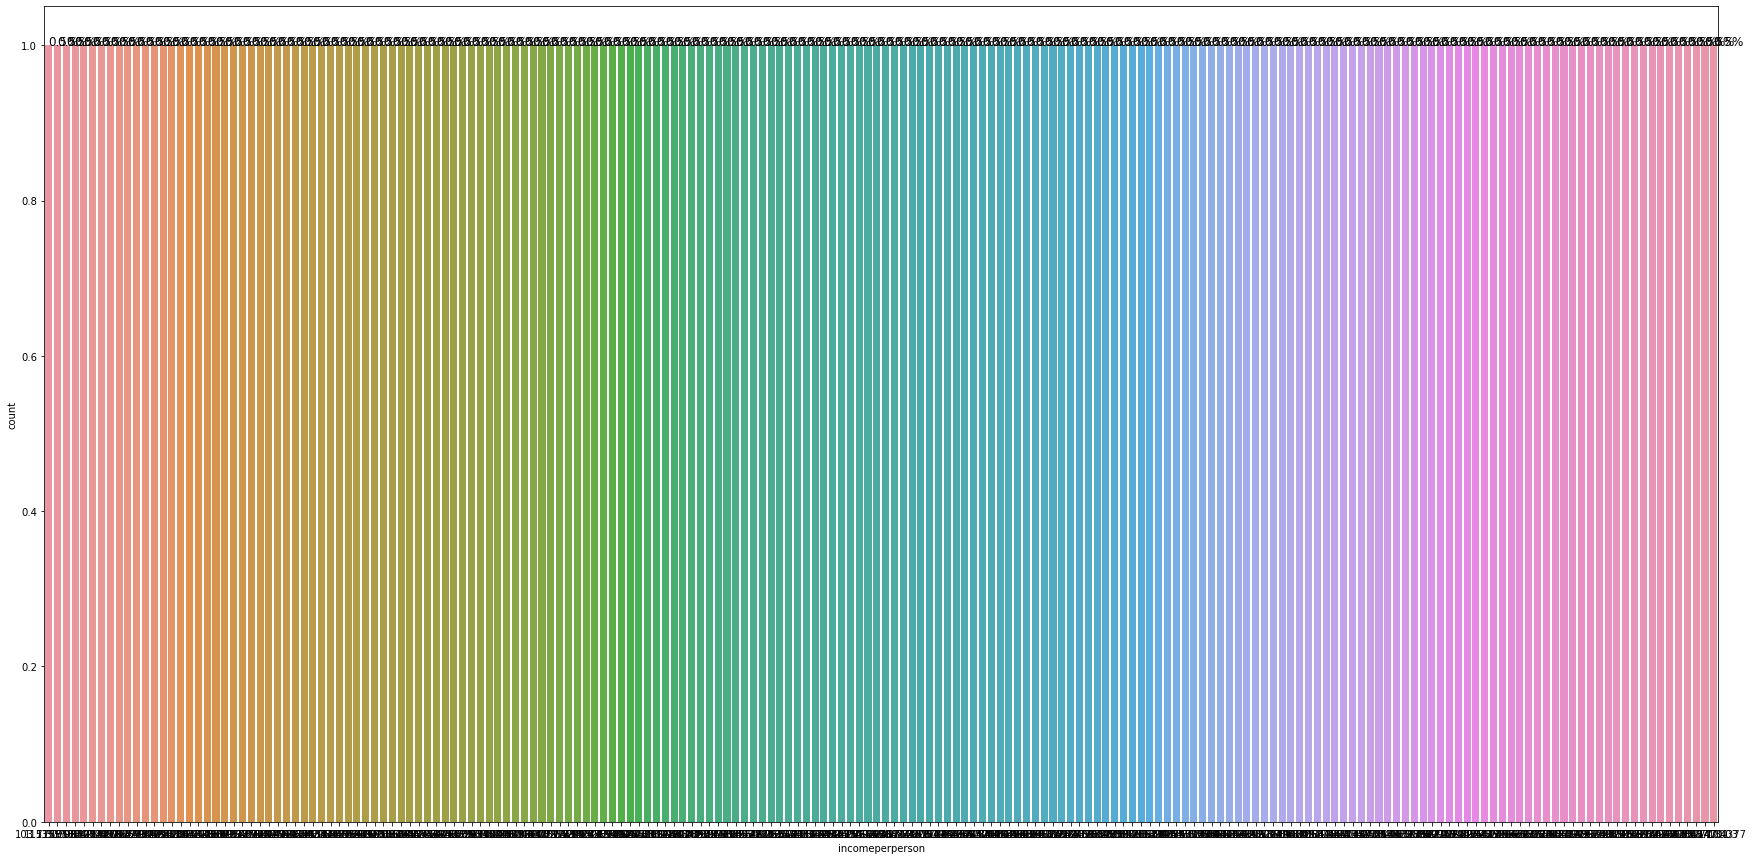

In [72]:
plt.figure(figsize=(30,15))
ax = sns.countplot(data["incomeperperson"])
perc_on_bar(ax,data["incomeperperson"])